# 1. Постановка задачи

> - Создать нейронную сеть, способную распознавать рукописные цифры.
> - Сравненить быстродействия свёрточной нейронной сети (CNN) c использованием библотеки Keras и нейронной сети без использования библиотек.

# 2. Краткое описание алгоритма:
>Алгоритм получает на вход изображение и должен распознать, что на нём за цифра. С точки зрения машинного обучения - это задача классификации. У нас есть 10 классов объектов, цифры от 0 до 9 и нехобходимо отнести изображение, которые поступают на вход к одному из этих классов.

## 3. Общие сведения о MNIST

>### Открытый набор данных
- http://yann.lecun.com/exdb/mnist
- 60 тысяч изображений рукописных цифр

>### Два файла
- Файл с изображениями
- Файл с метками классов (правильными ответами)

>### Формат изображение
- Размер 28x28 пикселей
- Оттенки серого (0 - белый цвет, 255 - черный)
- Изображение в бинарном виде записаны в один файл

### Справка
>Ян Лекун в своей работе 1989г. подготовил набор данных (Dataset) MNIST в котором содрежится большое количество  образцов написания рукописных цифр.
Каждая цифра содержится в отдельном изображении. 

>Пример : ![220px-MnistExamples.png](attachment:220px-MnistExamples.png)

In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

## Класс нейронной сети или её "костяк", которая состоит из:
- Инициализации - задание количество входных, скрытых и выходных узлов
- Тренировки - уточнение весовых коэффициентов в процессе обработки предоставленных для обучения сети тренировочных примеров
- Опроса - получение значений сигналов с выходных узлов после предоставления значений входящих сигналов

## Инициализация NN:
Здесь мы задаём количество входных, скрытых и выходных слоёв, а так коэффициент обучения и генерируем случайные значения весов

## Опрос NN:
Функция query() принимает в качестве аргумента входные данные нейронной сети и возрващает её выходные данные. Для этого нам нужно передать сигналы от узлов входного слоя через скрктый слой к узлам выходного слоя для получения выходных данных. При этом, по мере распространения сигналов мы должны сглаживать их, используя весовые коэффициенты связей между соотвествующими узлами, а так же применять сигмоиду для уменьшения выходных сигналов узлов.

## Тренировка сети:
Задачу тренировки можно разделить на две части:
- Первая часть - расчёт выходных сигналов для заданного тренировочного примера, это ничем не отличается от функции query().
- Вторая часть - сравнение рассчитаных выходных сигналов с желаемым ответом и обновление весовых коэффициентов связей между узлами на основе найденных различий.

In [2]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # веса генерируются случайным образом
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
input_nodes = 784 #Изображение состоит из 28*28 = 784 пикселя 
hidden_nodes = 200 #Из тестов было обнаружено, что это число скрытых слоёв
#является оптимальным
output_nodes = 10 #Соотвествует десяти классам чисел, от 0 до 9

learning_rate = 0.1 # Коэффициент обучения так же был опеределен исходя из тестов

#создаём обьект нейрнной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
training_data_file = open("C:\Program Files\dataSets\mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Тренировка нейронной сети

In [5]:
epochs = 5

for e in range(epochs):
    print(e+1,"Эпоха")
    for record in training_data_list:
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass
print("Тренировка Нейронной Сети Завершена успешно")

1 Эпоха
2 Эпоха
3 Эпоха
4 Эпоха
5 Эпоха
Тренировка Нейронной Сети Завершена успешно


In [6]:
test_data_file = open("C:\Program Files\dataSets\mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# Опрос сети

### для одного элемента

In [7]:
any_values = test_data_list[2].split(',')
print(any_values[0])

1


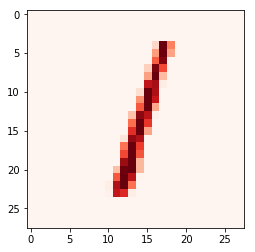

In [8]:
image_array = numpy.asfarray(any_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap="Reds",interpolation='None')

In [9]:
#опрос для сети конкретного элемента
n.query((numpy.asfarray(any_values[1:])/255.0*0.99)+0.01)


array([[0.00296522],
       [0.99029214],
       [0.00532403],
       [0.01064196],
       [0.01454573],
       [0.01599217],
       [0.00275677],
       [0.0093822 ],
       [0.00168888],
       [0.00631992]])

`
> видно что максимальное значение маркера принимает именно элемнент с индексом 1. Именно этого мы и ожидали
`

### для множества элементов

In [12]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
        
    else:
        scorecard.append(0)
        pass
    pass
print("Тестирование прошло успешно")

Тестирование прошло успешно


In [13]:
scorecard_array = numpy.asarray(scorecard)
print ("Эффективность работы нейронной сети = ", scorecard_array.sum() / scorecard_array.size)

Эффективность работы нейронной сети =  0.9734


# Результат
Рекорд точности составляет 0.9734 при 200 скрытых узлах. Времени на обработку: 21 минута. Это неплохо по сравнению с результатами эталлоных тестов, опубликованных на сайте Лекуна по адресу http://yann.lecun.com/exdb/mnist

## Используемые материалы
1. Тарик Рашид - Как создать свою нейронную сеть (2016г.)